In [1]:
import torch
import cv2
import numpy as np
import glob as glob
import os
import matplotlib
import matplotlib.pyplot as plt
import argparse
from torchvision import transforms
from models import efficientnet
#import efficientnet
import sys
from com.common_packages import check_if_dir_existed, check_if_file_existed
from com.colors import COLOR
import config
import utils
import engine
from dataset import load_dataset
class_names = ['Class0', 'Class1']
import torch.nn.functional as F

torch.Size([4, 10]) torch.Size([4, 3, 224, 224])


In [10]:
DATA = 'weather_2'
dataset=f'/media/igofed/SSD_2T/DATASETS/{DATA}'
model_name='efficientnet_b0'
test_path = os.path.join(dataset, 'test')
check_if_dir_existed(test_path)
device = utils.select_device(gpu=False)
test_set, test_loader = load_dataset(test_path, mode='test', balance_dataset=True)
print(device)

folder 		: /media/igofed/SSD_2T/DATASETS/weather_2/test is available
 [INFO]: Custom Loader for :	 test data 
Classes {'Class0': 0, 'Class1': 1} 
[INFO]: test Set:	477
	[INFO]: 144:	Class0 30.2%
	[INFO]: 333:	Class1 69.8%
 [INFO] In /media/igofed/SSD_2T/DATASETS/weather_2/test/Class0 144  Images 
 [INFO] In /media/igofed/SSD_2T/DATASETS/weather_2/test/Class1 333  Images 

[INFO] : Original test Set Size: 	477
	Num. of batches: 		15
	Num. of total examples: 	477
 ---------------------------------------
cpu


filename 	: /home/igofed/LiU/AI4Climate_/src/outputs/efficientnet_b0_weather_2_last_checkpoint.bin existed
folder 		: /home/igofed/LiU/AI4Climate_/src/outputs/images is available


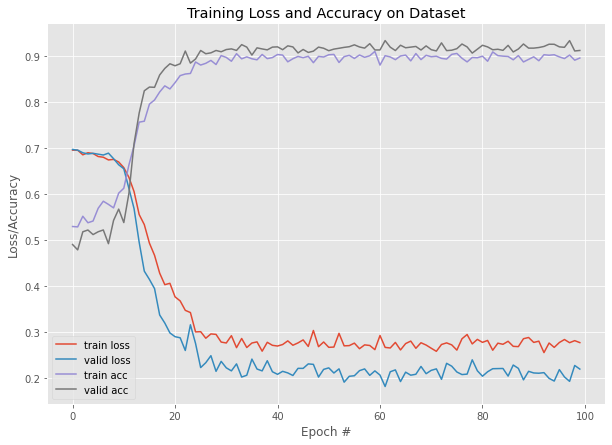

In [31]:
model_path = '/home/igofed/LiU/AI4Climate_/src/outputs/efficientnet_b0_weather_2_last_checkpoint.bin'
check_if_file_existed(model_path)
device = utils.select_device(gpu=False)
model_A = efficientnet.EfficientNet(
        version="efficientnet_b0",
        num_classes=2,
    ).to(device)
checkpoint = torch.load(model_path)
model_A.load_state_dict(checkpoint['model_state_dict'])
train_loss = checkpoint['train_loss']
train_acc = checkpoint['train_acc']
valid_loss = checkpoint['valid_loss']
valid_acc = checkpoint['valid_acc']
model_A.eval()
utils.save_plots(train_acc, valid_acc, train_loss, valid_loss, figure_name=model_path)
output_paths = os.path.join(os.getcwd(), 'outputs')
output_images = os.path.join(output_paths, 'images')
check_if_dir_existed(output_images, True)
#correct = 0
#total = 0
#models_ensemble = [model.to(device)]
#with torch.no_grad():
#    for data in test_loader:
#        images, labels = data
#        images = images.to(device)
#        labels = labels.to(device)
#        
#        predictions = [i(images).data for i in models_ensemble]
#        avg_predictions = torch.mean(torch.stack(predictions), dim=0)
#        _, predicted = torch.max(avg_predictions, 1)#
#
#        total += labels.size(0)
#        correct += (predicted == labels).sum().item()
#print('accuracy = {:f}'.format(correct / total))
#print('correct: {:d}  total: {:d}'.format(correct, total))

/media/igofed/SSD_2T/DATASETS/weather_2/test
0 /media/igofed/SSD_2T/DATASETS/weather_2/test/Class0/zurich_0071_0.png
1 /media/igofed/SSD_2T/DATASETS/weather_2/test/Class1/desktop_1862_1.png
2 /media/igofed/SSD_2T/DATASETS/weather_2/test/Class1/desktop_0936_1.png
3 /media/igofed/SSD_2T/DATASETS/weather_2/test/Class0/zurich_0097_0.png
4 /media/igofed/SSD_2T/DATASETS/weather_2/test/Class1/desktop_0078_1.png
5 /media/igofed/SSD_2T/DATASETS/weather_2/test/Class1/desktop_0679_1.png
6 /media/igofed/SSD_2T/DATASETS/weather_2/test/Class1/desktop_1603_1.png
7 /media/igofed/SSD_2T/DATASETS/weather_2/test/Class0/mobile_0466_0.png
8 /media/igofed/SSD_2T/DATASETS/weather_2/test/Class1/desktop_1566_1.png
9 /media/igofed/SSD_2T/DATASETS/weather_2/test/Class1/desktop_1466_1.png


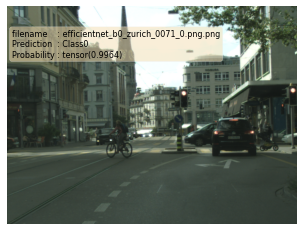

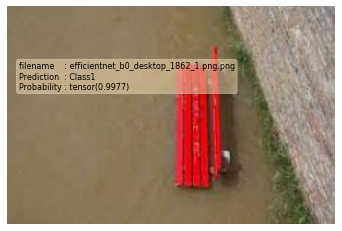

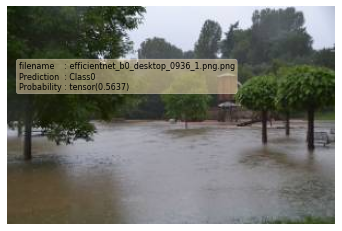

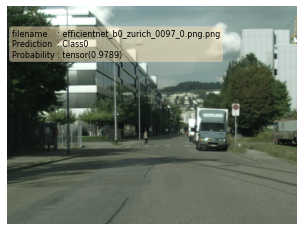

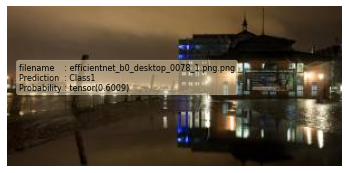

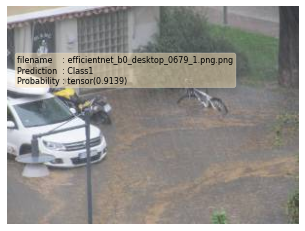

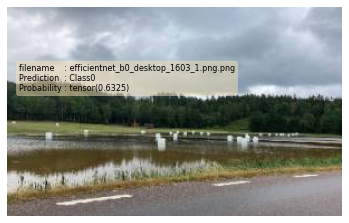

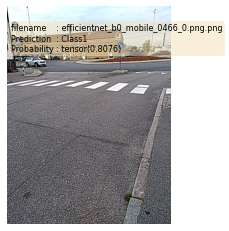

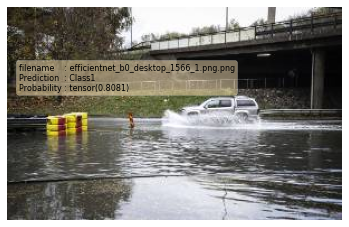

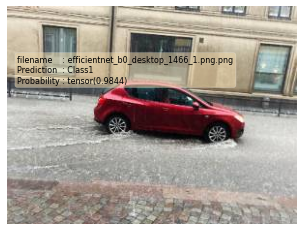

In [14]:
from pathlib import Path
import random
num_images_to_plot = 10
import torchvision
from torchvision import transforms
import cv2
from PIL import ImageFile, Image
print(test_path)
test_image_path_list = list(Path(test_path).glob("*/*.png")) # get list all image paths from test data 
test_image_path_sample = random.sample(population=test_image_path_list, # go through all of the test image paths
                                       k=num_images_to_plot) # randomly select 'k' image paths to pred and plot
i = 0

image_transform = transforms.Compose([
                    transforms.Resize((config.CFG.img_size, config.CFG.img_size)),
                    transforms.ToTensor(),
                    transforms.Normalize(
                        mean=config.CFG.mean, 
                        std=config.CFG.std)                
            ]
        )
model_A.to(device)
for image_path in test_image_path_sample:
    print(i, image_path)
        # Open image
    img = Image.open(image_path)
     # Turn on model evaluation mode and inference mode
    
    original_img = img.copy()
    model_A.eval()
    with torch.no_grad():
        # Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
        transformed_image = image_transform(img).unsqueeze(dim=0)
        target_image_pred = model_A(transformed_image.to(device))
      # Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
    # Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
    # Plot image with predicted label and probability
    #cv2.putText(
    #        img, f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}",
    #        (10, 25), cv2.FONT_HERSHEY_SIMPLEX,
    #        1.0, (0, 255, 0), 2, lineType=cv2.LINE_AA
    #    )
    #   
    image_path = f"{output_images}/{model_name}_{os.path.basename(image_path)}.png"
    #cv2.imwrite(image_path, img)
    #original_img.save("img1.png")
    plt.figure()
    plt.imshow(original_img)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    textstr = '\n'.join((
                    r'filename    : %s' % (os.path.basename(image_path),),        
                    r'Prediction  : %s' % (class_names[target_image_pred_label]),
                    r'Probability : %s' % (target_image_pred_probs.max()),

                    ))
    plt.text(10, 50, textstr, fontsize=8, verticalalignment='top', bbox=props)
    #plt.title(
    #    f"{os.path.basename(image_path)} Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}"
    #)
    plt.axis(False)
    plt.savefig(image_path)
    i = i +1


from sklearn.metrics import accuracy_score

In [16]:
test_set, test_loader = load_dataset(test_path, mode='test', balance_dataset=False)
correct = 0
total = 0
import torch.nn.functional as F

def get_predictions(model, iterator, device):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y_pred = model(x)

            y_prob = F.softmax(y_pred, dim=-1)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim=0)
    labels = torch.cat(labels, dim=0)
    probs = torch.cat(probs, dim=0)

    return images, labels, probs


images, labels, probs = get_predictions(model_A, test_loader, device)
pred_labels = torch.argmax(probs, 1)



 [INFO]: Custom Loader for :	 test data 
Classes {'Class0': 0, 'Class1': 1} 
[INFO]: test Set:	477
	[INFO]: 144:	Class0 30.2%
	[INFO]: 333:	Class1 69.8%

[INFO] : Original test Set Size: 	477
	Num. of batches: 		15
	Num. of total examples: 	477
 ---------------------------------------


In [17]:
images, labels, probs = get_predictions(model_A, test_loader, device)
pred_labels = torch.argmax(probs, 1)
#print(pred_labels, len(pred_labels), len(probs), len(images))

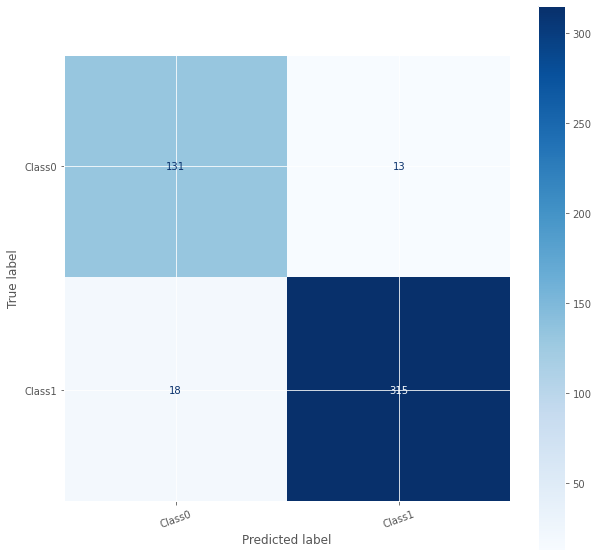

In [19]:
from sklearn import decomposition
from sklearn import manifold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def plot_confusion_matrix(labels, pred_labels, classes):

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    cm = confusion_matrix(labels, pred_labels)
    cm = ConfusionMatrixDisplay(cm, display_labels=classes)
    cm.plot(values_format='d', cmap='Blues', ax=ax)
    
    plt.xticks(rotation=20)



plot_confusion_matrix(labels, pred_labels, class_names)

In [30]:
tn, fp, fn, tp = confusion_matrix(labels, pred_labels, labels=[0,1]).ravel()

print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)
acc = (tp+tn)/(tp+tn+fp+fn)
print(f'Overal accuracy {acc:.3f}')
print(f'Miscalculation {1 - acc:.3f}')

True Positive 315
True Negative 131
False Positive 13
False Negative 18
Overal accuracy 0.935
Miscalculation 0.065
